# Group members:Blessy john,Nafeela Pary

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'E:\blessy\ict\E-commerce.xlsx')

In [3]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [4]:
data.shape

(2025, 13)

In [5]:
data.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2022.000000,2.024000e+03,2023.000000,2024.000000,2019.000000,2024.000000,2024.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63505.154721,6661.115119,10.290738,5359.607213,244.741107,0.342222,0.049877
std,26401.598808,3.108620e+05,36830.177344,17296.372880,4.961514,3076.114288,124.477650,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33845.500000,1465.000000,7.000000,2758.750000,190.000000,0.000000,0.000000
50%,46248.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,0.000000,0.000000
75%,69375.500000,7.996875e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


In [6]:
data.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [7]:
data.shape

(2025, 13)

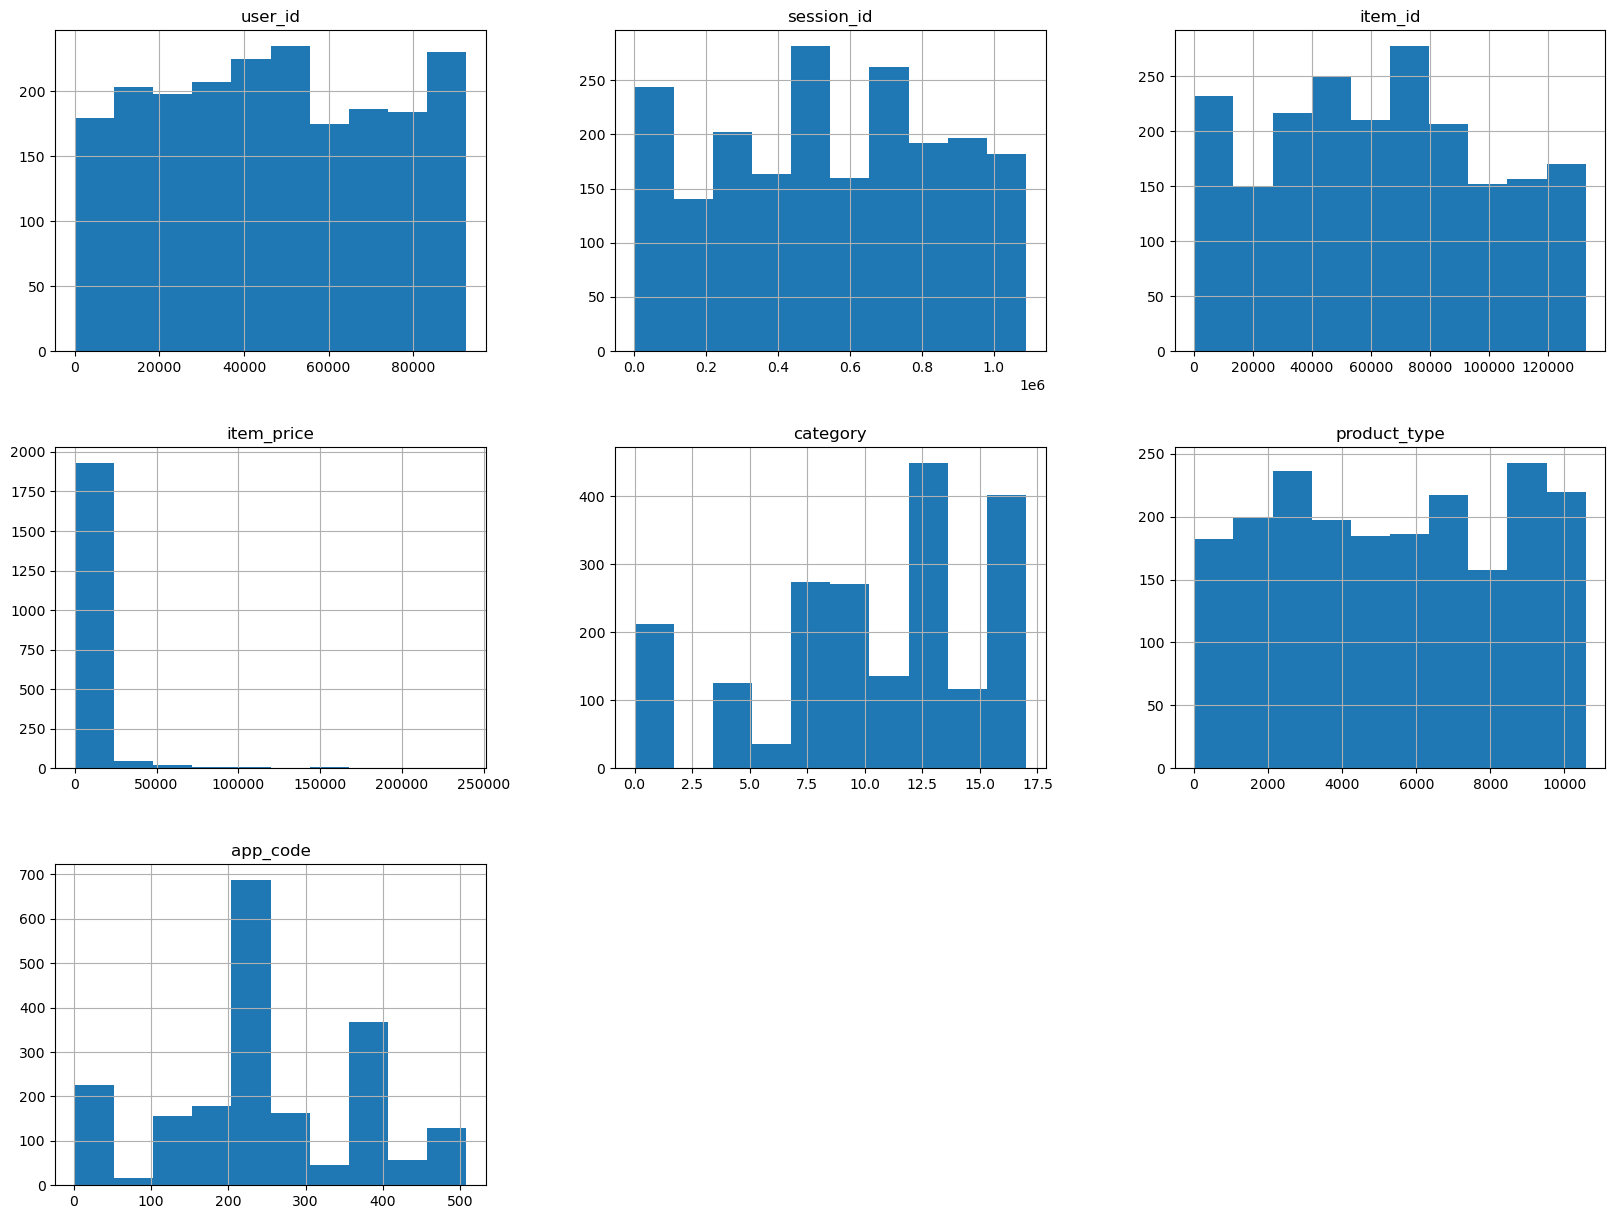

In [8]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
data.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [10]:
for col in['user_id', 'session_id', 'item_id','item_price', 'category', 'product_type','app_code']:
    data[col]=data[col].fillna(data[col].median())

In [11]:
data['os_version']=data['os_version'].fillna(data['os_version'].mode().iloc[0])

In [12]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

# outlier handling

In [13]:
num_cols=['user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'app_code','is_4G', 'is_click']

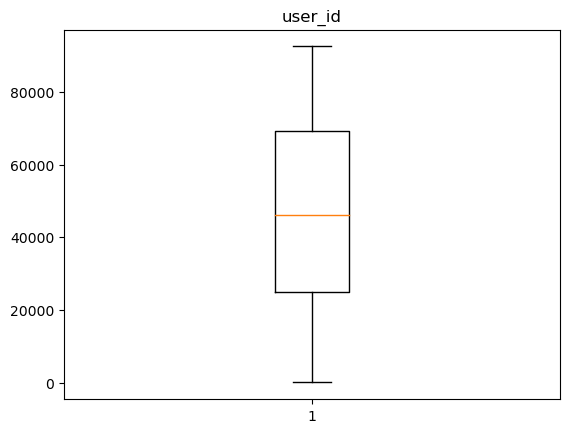

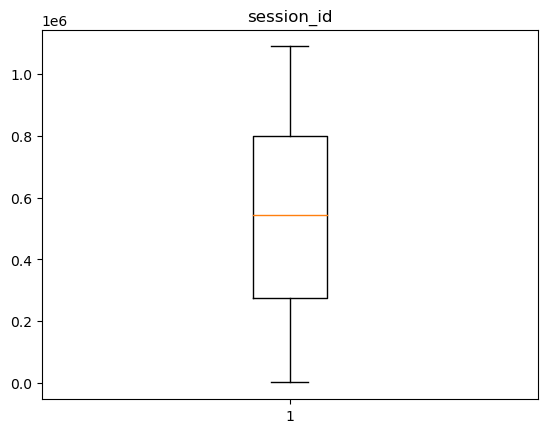

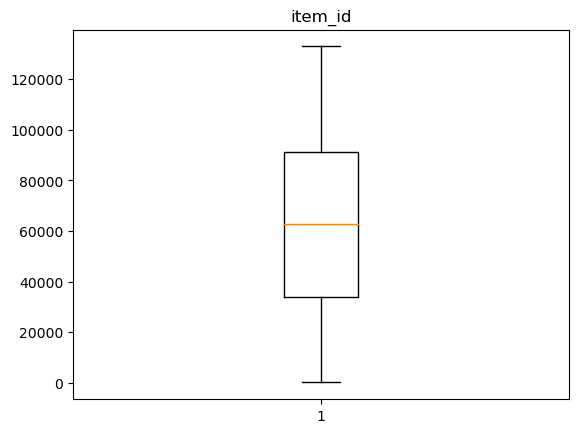

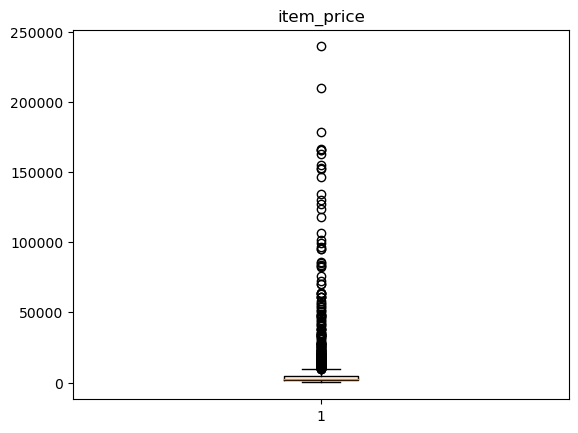

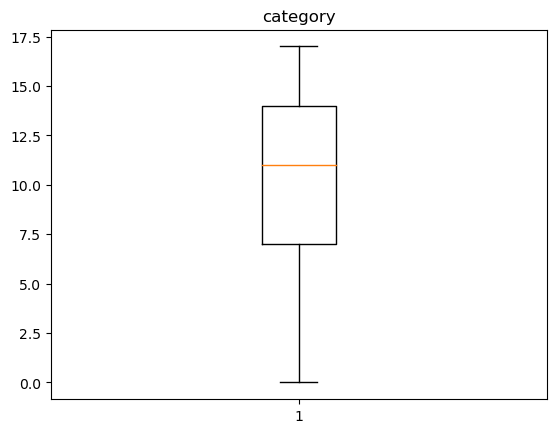

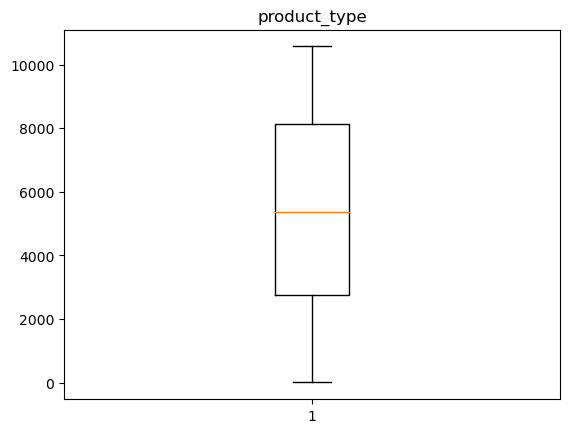

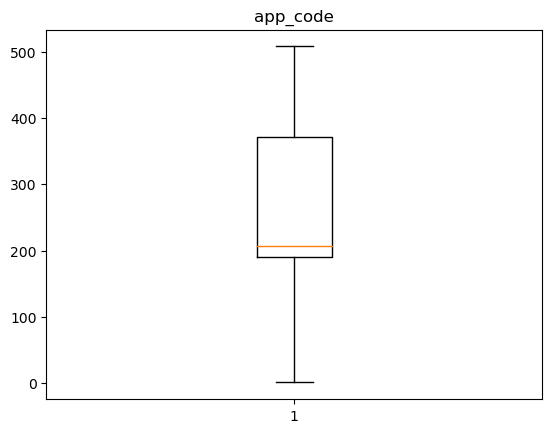

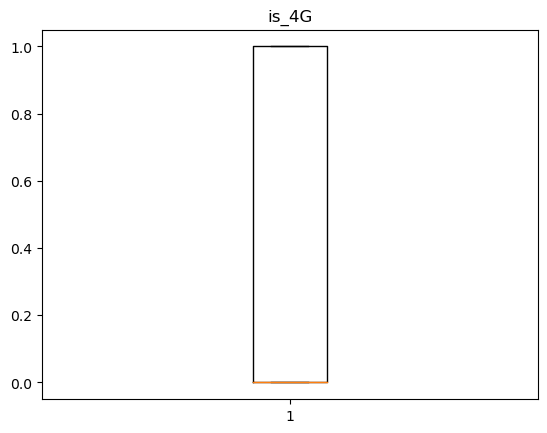

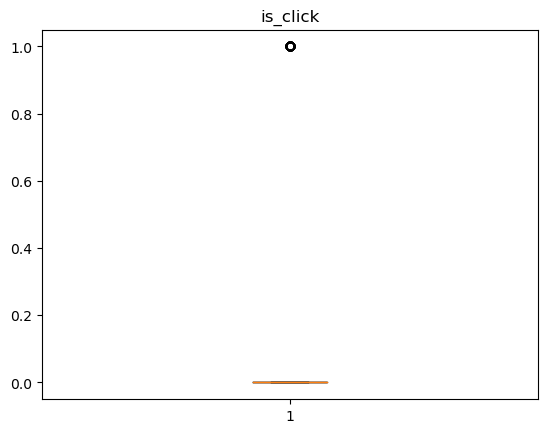

In [14]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [15]:
Q1=np.percentile(data['item_price'],25,interpolation='midpoint')
Q2=np.percentile(data['item_price'],50,interpolation='midpoint')
Q3=np.percentile(data['item_price'],75,interpolation='midpoint')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8044\3388736594.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['item_price'],25,interpolation='midpoint')
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8044\3388736594.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['item_price'],50,interpolation='midpoint')
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8044\3388736594.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional o

In [16]:
print(Q1)
print(Q2)
print(Q3)

1465.0
2425.0
4793.0


In [17]:
data['item_price'].median()

2425.0

In [18]:
IQR=Q3-Q1

In [19]:
print(IQR)

3328.0


In [20]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [21]:
print(up_lim)
print(low_lim)

9785.0
-3527.0


In [22]:
outliers=[]
for x in data['item_price']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)    

In [23]:
outliers

[18118.0,
 17856.0,
 17222.0,
 11462.0,
 10246.0,
 23040.0,
 10822.0,
 10816.0,
 11712.0,
 12221.0,
 46656.0,
 20492.0,
 85760.0,
 9990.0,
 54336.0,
 15296.0,
 13984.0,
 33984.0,
 13420.0,
 19526.0,
 51136.0,
 9959.0,
 10758.0,
 10886.0,
 25472.0,
 35136.0,
 11404.0,
 11456.0,
 99507.0,
 12280.0,
 53625.0,
 18668.0,
 22208.0,
 21409.0,
 83776.0,
 14906.0,
 18557.0,
 130154.0,
 20416.0,
 14080.0,
 117849.0,
 17222.0,
 178099.0,
 165665.0,
 11369.0,
 32576.0,
 10240.0,
 14016.0,
 41369.0,
 16416.0,
 63936.0,
 10087.0,
 10310.0,
 12096.0,
 10298.0,
 21120.0,
 26956.0,
 13000.0,
 16960.0,
 152652.0,
 16128.0,
 47936.0,
 10039.0,
 19008.0,
 9792.0,
 27545.0,
 20160.0,
 10310.0,
 18278.0,
 165665.0,
 96768.0,
 10816.0,
 14656.0,
 64000.0,
 37916.0,
 70336.0,
 27400.0,
 24969.0,
 15808.0,
 15296.0,
 40256.0,
 12672.0,
 49016.0,
 61056.0,
 15968.0,
 22348.0,
 17665.0,
 22912.0,
 16265.0,
 47360.0,
 20428.0,
 12736.0,
 21248.0,
 11392.0,
 32808.0,
 27443.0,
 10771.0,
 10944.0,
 11008.0,
 17664.

In [24]:
ind1=data['item_price']>up_lim
dr=data.loc[ind1].index.tolist()
print(dr)

[6, 7, 31, 34, 49, 51, 63, 68, 74, 86, 90, 107, 110, 113, 114, 122, 127, 138, 146, 161, 176, 179, 184, 191, 228, 242, 290, 294, 314, 325, 328, 352, 353, 368, 370, 386, 399, 419, 423, 428, 442, 447, 453, 458, 463, 464, 465, 467, 471, 472, 475, 478, 481, 493, 512, 538, 543, 561, 577, 581, 584, 595, 596, 598, 600, 603, 610, 639, 643, 644, 651, 663, 664, 669, 679, 688, 713, 715, 722, 726, 732, 736, 752, 767, 778, 800, 801, 840, 846, 849, 859, 865, 888, 900, 912, 925, 929, 942, 949, 953, 962, 970, 977, 984, 985, 992, 1000, 1013, 1024, 1025, 1033, 1035, 1037, 1057, 1060, 1063, 1065, 1106, 1113, 1121, 1132, 1140, 1146, 1151, 1157, 1166, 1168, 1182, 1198, 1199, 1204, 1206, 1213, 1238, 1248, 1257, 1264, 1267, 1272, 1278, 1281, 1298, 1305, 1320, 1325, 1327, 1329, 1342, 1359, 1373, 1374, 1376, 1386, 1387, 1393, 1396, 1419, 1424, 1426, 1432, 1445, 1446, 1451, 1455, 1460, 1487, 1488, 1490, 1503, 1511, 1520, 1529, 1535, 1542, 1551, 1556, 1560, 1572, 1580, 1584, 1585, 1586, 1592, 1594, 1599, 1606, 16

In [25]:
backup_data=data.copy()

In [26]:
data.drop([6, 7, 31, 34, 49, 51, 63, 68, 74, 86, 90, 107, 110, 113, 114, 122, 127, 138, 146, 161, 176, 179, 184, 191, 228, 242, 290, 294, 314, 325, 328, 352, 353, 368, 370, 386, 399, 419, 423, 428, 442, 447, 453, 458, 463, 464, 465, 467, 471, 472, 475, 478, 481, 493, 512, 538, 543, 561, 577, 581, 584, 595, 596, 598, 600, 603, 610, 639, 643, 644, 651, 663, 664, 669, 679, 688, 713, 715, 722, 726, 732, 736, 752, 767, 778, 800, 801, 840, 846, 849, 859, 865, 888, 900, 912, 925, 929, 942, 949, 953, 962, 970, 977, 984, 985, 992, 1000, 1013, 1024, 1025, 1033, 1035, 1037, 1057, 1060, 1063, 1065, 1106, 1113, 1121, 1132, 1140, 1146, 1151, 1157, 1166, 1168, 1182, 1198, 1199, 1204, 1206, 1213, 1238, 1248, 1257, 1264, 1267, 1272, 1278, 1281, 1298, 1305, 1320, 1325, 1327, 1329, 1342, 1359, 1373, 1374, 1376, 1386, 1387, 1393, 1396, 1419, 1424, 1426, 1432, 1445, 1446, 1451, 1455, 1460, 1487, 1488, 1490, 1503, 1511, 1520, 1529, 1535, 1542, 1551, 1556, 1560, 1572, 1580, 1584, 1585, 1586, 1592, 1594, 1599, 1606, 1613, 1632, 1636, 1641, 1644, 1646, 1661, 1670, 1673, 1678, 1695, 1697, 1699, 1709, 1722, 1723, 1724, 1726, 1741, 1743, 1746, 1756, 1769, 1780, 1789, 1790, 1803, 1804, 1805, 1808, 1810, 1813, 1827, 1829, 1832, 1837, 1856, 1857, 1858, 1860, 1861, 1865, 1866, 1868, 1869, 1877, 1879, 1882, 1885, 1933, 1937, 1948, 1953, 1961, 1978, 1981, 1983, 1998, 2012],inplace=True)

In [27]:
data.shape

(1780, 13)

# one hot encoding

In [28]:
data1=pd.get_dummies(data)

In [29]:
data1.shape

(1780, 15)

In [30]:
data.dtypes

server_time        datetime64[ns]
device_type                object
user_id                   float64
session_id                float64
item_id                   float64
item_price                float64
category                  float64
product_type              float64
impression_time    datetime64[ns]
app_code                  float64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [31]:
data['device_type'].nunique()

1

In [32]:
data['os_version'].nunique()

3

In [33]:
data1.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,device_type_android,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,1,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,1,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,1,0,1,0


# label encoding

In [34]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
data['device_type']=le.fit_transform(data['device_type'])

In [38]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,0,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,0,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,0,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,0,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,0,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [39]:
data['device_type'].unique()

array([0])

# Min max scaling

In [67]:
x=data.drop('is_click',axis=1)

In [68]:
y=data['is_click']

In [69]:
x.describe()

,device_type,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G
count,1780.0,1780.000000,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,0.0,46729.493820,5.467858e+05,63532.398876,2774.356180,10.260112,5367.814888,244.198876,0.342697
std,0.0,26387.962825,3.087378e+05,36639.606662,2034.199606,4.840605,3077.228646,124.634935,0.474744
min,0.0,10.000000,1.694000e+03,176.000000,16.000000,0.000000,8.000000,1.000000,0.000000
25%,0.0,24882.250000,2.738070e+05,34687.000000,1273.000000,7.000000,2739.500000,190.000000,0.000000
50%,0.0,46148.000000,5.440370e+05,63579.500000,2240.000000,11.000000,5403.000000,207.000000,0.000000
75%,0.0,69426.000000,7.992640e+05,90815.000000,3713.250000,13.000000,8121.000000,371.000000,1.000000
max,0.0,92508.000000,1.089219e+06,132865.000000,9780.000000,17.000000,10573.000000,508.000000,1.000000


In [57]:
x1=x.drop(['device_type','os_version','server_time','impression_time'],axis=1)

In [58]:
x1.head()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G
0,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,422.0,0
1,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,467.0,1
2,71748.0,268465.0,44459.0,825.0,17.0,1619.0,259.0,1
3,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,244.0,1
4,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,473.0,0


In [59]:
from sklearn.preprocessing  import MinMaxScaler

In [60]:
min_max=MinMaxScaler()

In [61]:
x1=min_max.fit_transform(x1)

In [62]:
type(x1)

numpy.ndarray

In [63]:
x1=pd.DataFrame(x1,columns=['user_id','session_id','item_id','item_price','category','product_type','app_code','is_4G'])

In [64]:
x1.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G
count,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,0.505087,0.501222,0.477480,0.282503,0.603536,0.507318,0.479682,0.342697
std,0.285281,0.283890,0.276131,0.208337,0.284741,0.291266,0.245828,0.474744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.268895,0.250213,0.260089,0.128738,0.411765,0.258542,0.372781,0.000000
50%,0.498800,0.498695,0.477835,0.227776,0.647059,0.510648,0.406312,0.000000
75%,0.750459,0.733381,0.683094,0.378661,0.764706,0.767913,0.729783,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Standard scaling

In [71]:
x.describe()

,device_type,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G
count,1780.0,1780.000000,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,0.0,46729.493820,5.467858e+05,63532.398876,2774.356180,10.260112,5367.814888,244.198876,0.342697
std,0.0,26387.962825,3.087378e+05,36639.606662,2034.199606,4.840605,3077.228646,124.634935,0.474744
min,0.0,10.000000,1.694000e+03,176.000000,16.000000,0.000000,8.000000,1.000000,0.000000
25%,0.0,24882.250000,2.738070e+05,34687.000000,1273.000000,7.000000,2739.500000,190.000000,0.000000
50%,0.0,46148.000000,5.440370e+05,63579.500000,2240.000000,11.000000,5403.000000,207.000000,0.000000
75%,0.0,69426.000000,7.992640e+05,90815.000000,3713.250000,13.000000,8121.000000,371.000000,1.000000
max,0.0,92508.000000,1.089219e+06,132865.000000,9780.000000,17.000000,10573.000000,508.000000,1.000000


In [72]:
x2=x.drop(['device_type','os_version','server_time','impression_time'],axis=1)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
std_scl=StandardScaler()

In [75]:
x2=std_scl.fit_transform(x2)

In [76]:
type(x2)

numpy.ndarray

In [77]:
x2=pd.DataFrame(x2,columns=['user_id','session_id','item_id','item_price','category','product_type','app_code','is_4G'])

In [78]:
x2.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G
count,1.780000e+03,1.780000e+03,1.780000e+03,1780.000000,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03
mean,-8.183217e-17,5.987720e-18,7.983626e-17,0.000000,1.097749e-16,2.594679e-17,9.181170e-17,3.991813e-18
std,1.000281e+00,1.000281e+00,1.000281e+00,1.000281,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00
min,-1.770983e+00,-1.766045e+00,-1.729664e+00,-1.356372,-2.120188e+00,-1.742256e+00,-1.951838e+00,-7.220578e-01
25%,-8.281573e-01,-8.844253e-01,-7.874949e-01,-0.738265,-6.736820e-01,-8.543575e-01,-4.349832e-01,-7.220578e-01
50%,-2.204252e-02,-8.905908e-03,1.285886e-03,-0.262760,1.528932e-01,1.143724e-02,-2.985465e-01,-7.220578e-01
75%,8.603500e-01,8.180052e-01,7.448297e-01,0.461684,5.661808e-01,8.949477e-01,1.017666e+00,1.384931e+00
max,1.735313e+00,1.757432e+00,1.892817e+00,3.444899,1.392756e+00,1.691993e+00,2.117185e+00,1.384931e+00
